# Statistics: a Guide to the use of Statistical Methods in the Physical Sciences

### Chapter 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scripts.distributions as dist
import scipy

##### Binomial Distribution

Describes processes with a given number of identical trials, with two possible outcomes.

$$
P(r;p,n) = p^r(1-p)^{n-r}\frac{n!}{r!(n-r!)}
$$

$p$ is probability of success, $1-p$ probability of failure, $n$ is number of trials and $r$ is number of successes.

**Properties of the binomial distribution**
$$
\text{Mean number of success: } \langle r \rangle = np\\
\text{Variance: } V(r) = np(1 - p)
$$


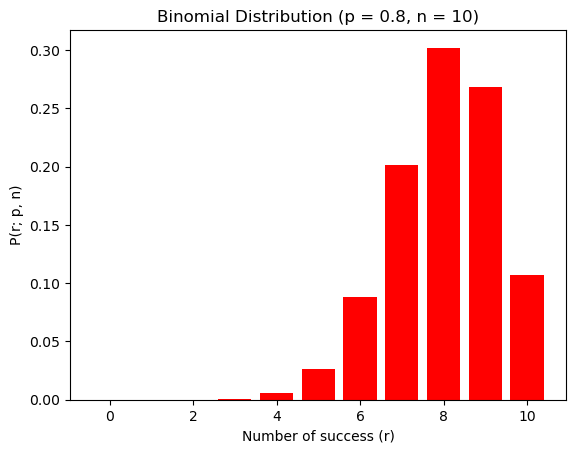

In [3]:
r_vals = np.arange(0,11)
p = 0.8
n = 10
bin_dist = [dist.binomial_dist(r, p, n) for r in r_vals]
plt.bar(r_vals, bin_dist, color='red')
plt.title(f"Binomial Distribution (p = {p}, n = {n})")
plt.xlabel("Number of success (r)")
plt.ylabel("P(r; p, n)")
plt.show()

Checking the validity of the implementation comparing its output with the function provided by SciPy.

In [5]:
# n and p is given in the last cell
k = 6

bin_scipy = scipy.stats.binom.pmf(k, n, p)
bin = dist.binomial_dist(k, p, n)
print(f"this work:{bin}, scipy:{bin_scipy}")

this work:0.08808038399999996, scipy:0.08808038399999985


##### Poisson Distribution

Describes cases where there are particular outcomes but no idea of the number of trials - sharp events occurring in a continuum.

$$
P(r;\lambda) = \frac{e^{-\lambda}\lambda^r}{r!}
$$
probability of obtaining r events if the mean expected number is $\lambda$.

**Properties of the Poisson distribution**

$$
\text{Mean number of events: } \langle r \rangle = \lambda\\
\text{Variance: } V(r) = \lambda
$$

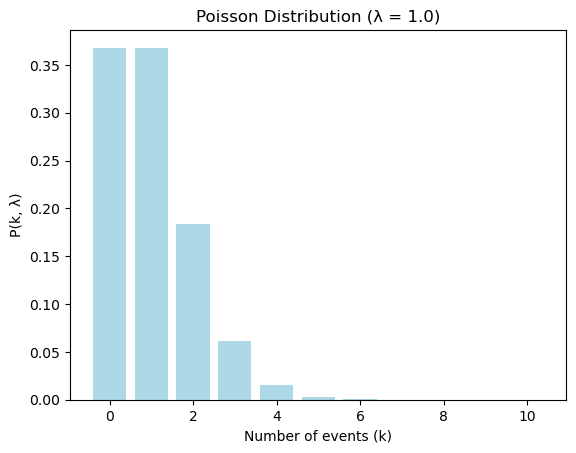

In [7]:
lam = 1.0
k_vals = np.arange(0, 10)
poi_dist = [dist.poisson_dist(r, lam) for r in r_vals]
plt.bar(r_vals, poi_dist, color='lightblue')
plt.title(f"Poisson Distribution (λ = {lam})")
plt.xlabel("Number of events (k)")
plt.ylabel("P(k, λ)")
plt.show()

Checking the validity of the implementation comparing its output with the function provided by SciPy.

In [8]:
poi = dist.poisson_dist(k, lam)
poi_scipy = scipy.stats.poisson.pmf(k, lam)
print(f"this work:{poi}, scipy:{poi_scipy}")

this work:0.0005109436682936699, scipy:0.0005109436682936698


##### Normal Distribution

Bell-shaped curve centred on $x=\mu$ and width controlled by the standard deviation $\sigma$.

$$
P(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}
$$

**Properties of the normal distribution**

$$
\text{it is normalized to 1: } \int^\infty_\infty P(x;\mu,\sigma)dx = 1\\
\text{$\mu$ is the mean} \int^\infty_\infty xP(x;\mu,\sigma)dx = \mu\\
\text{$\sigma^2$ is the variance} \int^\infty_\infty (x - \mu)^2P(x;\mu,\sigma)dx = \sigma^2
$$


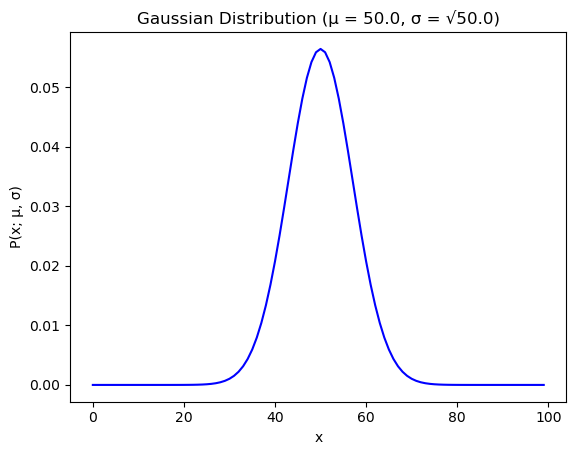

In [9]:
x_vals = np.arange(0,100)
mu = 50.0
sig = math.sqrt(mu)
gauss_dist = [dist.gaussian_dist(x, mu, sig) for x in x_vals]


plt.plot(x_vals, gauss_dist, color='blue')
plt.title(f"Gaussian Distribution (μ = {mu}, σ = √{mu})")
plt.xlabel("x")
plt.ylabel("P(x; μ, σ)")
plt.show()

Checking the validity of the implementation comparing its output with the function provided by SciPy.

In [11]:
x = 40
norm = dist.gaussian_dist(x, mu, sig)
norm_scipy = scipy.stats.norm.pdf(x, loc=mu, scale=sig)
print(f"this work:{norm}, scipy:{norm_scipy}")

this work:0.02075537487102974, scipy:0.02075537487102974


##### Binomial vs Gaussian distribution

For larger $n$, the binomial tends to a gaussian given $\mu = np$ and $\sigma = \sqrt{np(1-p)}$.

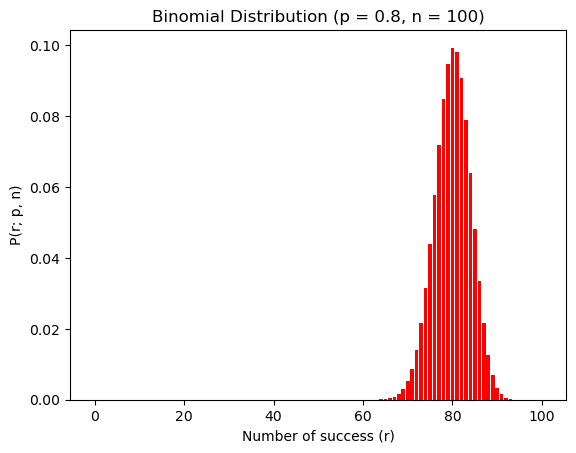

In [7]:
r_vals = np.arange(0,101)
p = 0.8
n = 100
bin_dist = [dist.binomial_dist(r, p, n) for r in r_vals]
bin_expected = n * p
bin_variance = n * p * (1 - p)
plt.bar(r_vals, bin_dist, color='red')
plt.title(f"Binomial Distribution (p = {p}, n = {n})")
plt.xlabel("Number of success (r)")
plt.ylabel("P(r; p, n)")
plt.show()

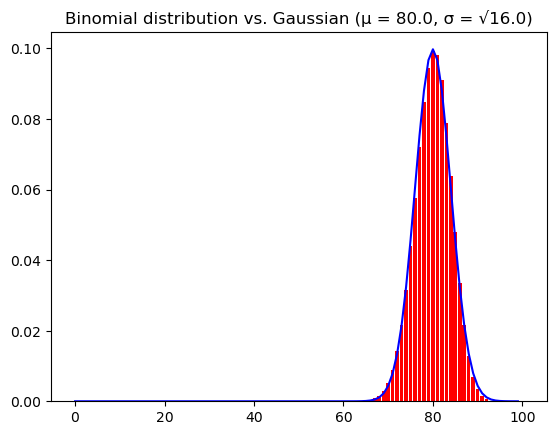

In [8]:
gauss_bin = [dist.gaussian_dist(x, bin_expected, math.sqrt(bin_variance)) for x in x_vals]

plt.bar(r_vals, bin_dist, color='red')
plt.plot(x_vals, gauss_bin, color='blue')
plt.title(f"Binomial distribution vs. Gaussian (μ = {bin_expected}, σ = √{round(bin_variance, 2)})")
plt.show()

##### Poisson vs Gaussian distribution

For large $\lambda$, the poisson distribution tends to a gaussian given $\mu = \lambda$ and $\sigma = \sqrt{\lambda}$.

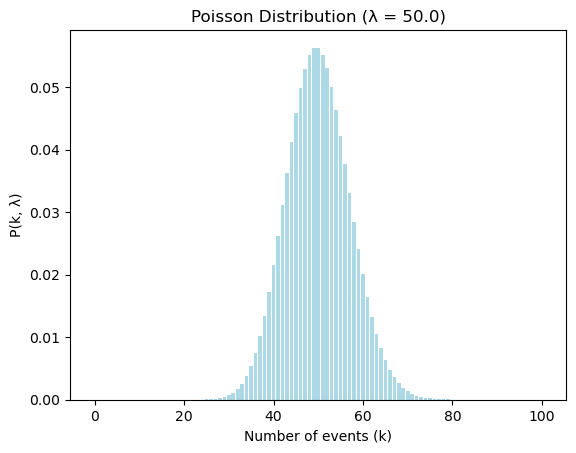

In [9]:
lam = 50.0
k_vals = np.arange(0, 100)
poi_dist = [dist.poisson_dist(r, lam) for r in r_vals]
plt.bar(r_vals, poi_dist, color='lightblue')
plt.title(f"Poisson Distribution (λ = {lam})")
plt.xlabel("Number of events (k)")
plt.ylabel("P(k, λ)")
plt.show()

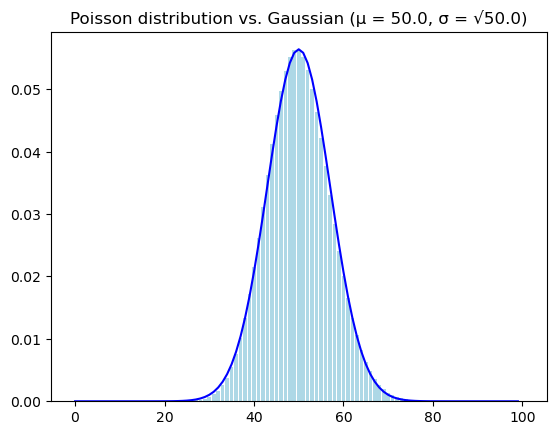

In [10]:
gauss_poisson = [dist.gaussian_dist(x, lam, math.sqrt(lam)) for x in x_vals]

plt.bar(r_vals, poi_dist, color='lightblue')
plt.plot(x_vals, gauss_poisson, color='blue')
plt.title(f"Poisson distribution vs. Gaussian (μ = {lam}, σ = √{lam})")
plt.show()

#### Problems

Problem 1:

In [20]:
r = 100
p = 0.995
n = 100
print(f"{round(dist.binomial_dist(r, p, n) * 100)} %")

61 %


Problem 3:

In [23]:
lam = 15.7 / 2
prob_less5 = 0
for r in range(0,5):
    prob_less5 = prob_less5 + dist.poisson_dist(r, lam)
prob_less5

0.10854834297002636

Problem 4:

In [26]:
g = 0
for x in range(0,5):
    g = g + dist.gaussian_dist(x, lam, math.sqrt(lam))
g

0.11329999000696109

Problem 5:

In [ ]:
p = 0.01
r = 0    #student is still waiting
n = 60
dist.binomial_dist(r, p, n)

0.5471566423907612

In [30]:
lam = 60 * 0.01
r = 0
dist.poisson_dist(r, lam)

0.5488116360940264